In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss="binary_crossentropy", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-lstm-model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, 
                    validation_data = (val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 11ms/step - loss: 0.6926 - accuracy: 0.5392 - val_loss: 0.6919 - val_accuracy: 0.5706
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6907 - accuracy: 0.6018 - val_loss: 0.6894 - val_accuracy: 0.6208
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6864 - accuracy: 0.6432 - val_loss: 0.6827 - val_accuracy: 0.6674
Epoch 4/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6641 - accuracy: 0.6959 - val_loss: 0.6390 - val_accuracy: 0.7078
Epoch 5/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6215 - accuracy: 0.7185 - val_loss: 0.6134 - val_accuracy: 0.7238
Epoch 6/100
313/313 [==============================] - 4s 11ms/step - loss: 0.5993 - accuracy: 0.7358 - val_loss: 0.5973 - val_accuracy: 0.7304
Epoch 7/100
313/313 [==============================] - 4s 11ms/step - loss: 0.5814 - accuracy: 0.7473 - val_loss: 0.5803 - val_accuracy:

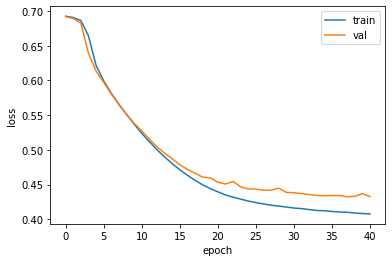

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation="sigmoid"))

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-dropout-model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience =3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                     callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 13ms/step - loss: 0.6926 - accuracy: 0.5314 - val_loss: 0.6920 - val_accuracy: 0.5616
Epoch 2/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6902 - accuracy: 0.6032 - val_loss: 0.6884 - val_accuracy: 0.6142
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6785 - accuracy: 0.6059 - val_loss: 0.6596 - val_accuracy: 0.6198
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6291 - accuracy: 0.7134 - val_loss: 0.6170 - val_accuracy: 0.7292
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6076 - accuracy: 0.7282 - val_loss: 0.6018 - val_accuracy: 0.7380
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5922 - accuracy: 0.7401 - val_loss: 0.5873 - val_accuracy: 0.7422
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5790 - accuracy: 0.7422 - val_loss: 0.5739 - val_accuracy:

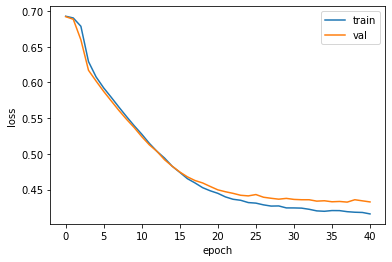

In [9]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [10]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation="sigmoid"))

In [11]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-2rnn-model.h5",
                                               save_best_only=True)
early_stopping_cb= keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size =64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 20ms/step - loss: 0.6925 - accuracy: 0.5395 - val_loss: 0.6916 - val_accuracy: 0.5888
Epoch 2/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6881 - accuracy: 0.6160 - val_loss: 0.6824 - val_accuracy: 0.6078
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6524 - accuracy: 0.6680 - val_loss: 0.6086 - val_accuracy: 0.7064
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5766 - accuracy: 0.7232 - val_loss: 0.5497 - val_accuracy: 0.7450
Epoch 5/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5378 - accuracy: 0.7467 - val_loss: 0.5230 - val_accuracy: 0.7476
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5127 - accuracy: 0.7612 - val_loss: 0.4953 - val_accuracy: 0.7674
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4965 - accuracy: 0.7710 - val_loss: 0.4833 - val_accuracy:

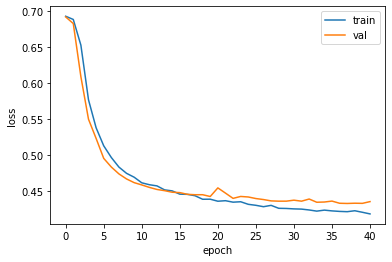

In [13]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","val"])
plt.show()

In [14]:
"""
-GRU 구조
GRU는 Gated Recurrent Unit 의 약자

GRU셀은 LSTM보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지않은 좋은 성능을 내는것으로 알려져 있다
GRU 셀을 사용한 순환 신경망을 만들어 봄
"""
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation="sigmoid"))

In [15]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-gru-model.h5",
                                               save_best_only=True)
early_stopping_cb= keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size =64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6922 - accuracy: 0.5349 - val_loss: 0.6915 - val_accuracy: 0.5668
Epoch 2/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6894 - accuracy: 0.5941 - val_loss: 0.6885 - val_accuracy: 0.5908
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6847 - accuracy: 0.6166 - val_loss: 0.6828 - val_accuracy: 0.6074
Epoch 4/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6774 - accuracy: 0.6246 - val_loss: 0.6745 - val_accuracy: 0.6220
Epoch 5/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6657 - accuracy: 0.6416 - val_loss: 0.6616 - val_accuracy: 0.6326
Epoch 6/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6479 - accuracy: 0.6567 - val_loss: 0.6408 - val_accuracy: 0.6544
Epoch 7/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6192 - accuracy: 0.6774 - val_loss: 0.6072 - val_accuracy:

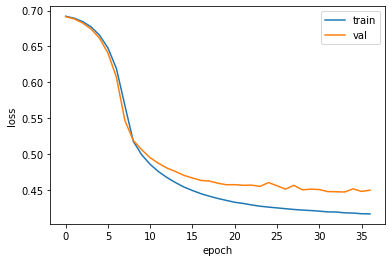

In [17]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [18]:
"""
LSTM 과 GRU 셀로 훈련
"""
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model("best-2rnn-model.h5")
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 7s 8ms/step - loss: 0.4280 - accuracy: 0.8000


[0.4280185103416443, 0.7999600172042847]